In [0]:
import numpy as np
import pandas as pd
import plotly.express as px

In [0]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
px.imshow(x_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train)

In [0]:
y_cat_test = to_categorical(y_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [17]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5092 - accuracy: 0.4546 - val_loss: 1.2454 - val_accuracy: 0.5580
Epoch 2/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1668 - accuracy: 0.5870 - val_loss: 1.0999 - val_accuracy: 0.6153
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0160 - accuracy: 0.6445 - val_loss: 1.0353 - val_accuracy: 0.6395
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9064 - accuracy: 0.6833 - val_loss: 0.9771 - val_accuracy: 0.6675
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8092 - accuracy: 0.7163 - val_loss: 0.9926 - val_accuracy: 0.6633


In [0]:
metrics = pd.DataFrame(model.history.history)

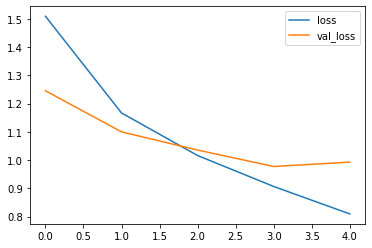

In [19]:
metrics[['loss', 'val_loss']].plot()

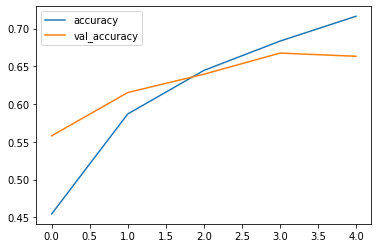

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

In [21]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9926199913024902, 0.6632999777793884]

In [22]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
from  sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.70      1000
           1       0.69      0.86      0.77      1000
           2       0.62      0.52      0.56      1000
           3       0.49      0.45      0.47      1000
           4       0.56      0.69      0.62      1000
           5       0.57      0.61      0.59      1000
           6       0.87      0.63      0.73      1000
           7       0.67      0.75      0.71      1000
           8       0.80      0.74      0.77      1000
           9       0.79      0.64      0.70      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [25]:
px.imshow(confusion_matrix(y_test, y_pred))